## 모두의파이썬 교재의16장 (교재p 236~)
- 이미지 인식 컨볼루션 신경망(CNN)


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

import os

### 이미지분류에 필요한 데이터셋 - 아래의 데이터셋종류1에 해당함
- [데이터셋종류1] npy나,npz로 넘파이화된 이미지 이거나
- [데이터셋종류2] jpg 나 png등의 이미지파일

In [2]:
# ★★필수작업★★
# 텐서플로우 데이터셋에서 제공하는 넘파이화된 손글씨 자료임
# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장합니다. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다. 
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


In [3]:
## [교재외 추가자료임]
# x이미지 데이터는 행28,열28개의 흑백이미지, 0~255값을 가짐
# y_train의 레이블 정보는 0~9의 숫자값 (원핫인코딩 안되어 있음)임을 알수 있음.

def info(var):
    print(np.shape(var), np.min(var), '~', np.max(var))
    
print('▶--- x자료 정보')
info(X_train)

print('\n▶--- y자료 정보')
info(y_train),y_train[0]

▶--- x자료 정보
(60000, 28, 28) 0 ~ 255

▶--- y자료 정보
(60000,) 0 ~ 9


(None, 5)

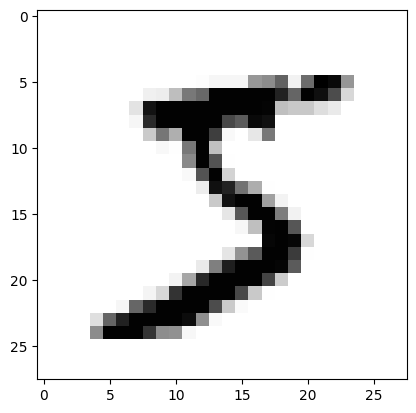

In [4]:
# 첫 번째 이미지를 확인해 봅시다.
# [▶▶▶ cmap='gray' 로 변경해서도 작업해봅니다.]
plt.imshow(X_train[0], cmap='Greys')   
plt.show()

In [10]:
# 이미지가 인식되는 원리를 알아봅시다.
# 행열의 각 원소에 0~255의 숫자로 색의 농도를 표현함을 확인하는 용도임
# [▶▶▶ 구글검색:  sys.stdout ]

for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)   # sys.stdou
    sys.stdout.write('\n')

# for x in X_train[0]:
#     for i in x:
#         print("%-3s" % i, end=' ')   # sys.stdou
#     print()

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [17]:
X_train.shape

(60000, 28, 28)

In [18]:
## ★★필수작업★★
# 차원 변환 과정을 실습해 봅니다.
# conv2D는 행*열*채널 로 입력해야함.  흑백자료는 28,28로 들어오지만 conv2D에 넣으려면 28,28,1로 진행해야함.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255


## ★★선택작업★★  y값은 원핫인코딩 하지 않으면 loss에서 'sparse_categorical_crossentropy' 로 진행하면됨
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [39]:
X_train.shape

(60000, 28, 28, 1)

![](2022-10-19-14-31-26.png)

In [34]:
for x in X_train[0]:
    for i in x:
        print("%-3s" % i, end=' ')   # sys.stdou
    print()

[0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] 
[0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] 
[0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] 
[0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] 
[0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] 
[0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.01176471] [0.07058824] [0.07058824] [0.07058824] [0.49411765] [0.53333336] [0.6862745] [0.10196079] [0.6509804] [1.] [0.96862745] [0.49803922] [0.] [0.] [0.] [0.] 
[0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.11764706] [0.14117648] [0

## 3. 컨볼루션 신경망(CNN)
- conv2D는 cpu 환경에서 속도느림
- gpu환경은 코렙에서 실행해야 하나 1일 사용할수 있는 gpu가 한계가 있어 
- 이 작업은 로컬pc의 cpu에서 실행하여 모델의 구성과 실행에만 중점을 맞춤
- 전이학습을 코렙에서 실행하고자함.

In [29]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
MODEL_DIR = './data/model/'  # 폴더없어도 알아서 생성됨
modelpath="./data/model/MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, 
                               monitor='val_loss',       # val_loss값을 기준으로
                               verbose=1,                # 실행결과를 화면에 출력함. verbose=0하면 실행결과가 화면에 나타나지않음
                               save_best_only=True)  # 가장좋은(즉 loss숫자가 가장 낮은) 모델을 저장함

early_stopping_callback = EarlyStopping(monitor='val_loss', 
                                        patience=10) # 실행하다가 10번이상 더 좋은 결과가 없으면 중단,여기서는 epochs를3으로해서 의미없음.

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, 
                    epochs=3, batch_size=200, 
                    verbose=0, 
                    callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.08108, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.08108 to 0.05852, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05852 to 0.05289, saving model to ./data/model\MNIST_CNN.hdf5
313/313 [==============================] - 2s 7ms/step - loss: 0.0419 - accuracy: 0.9860

 Test Accuracy: 0.9860


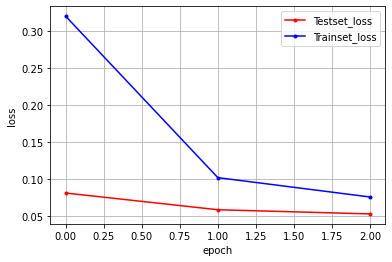

In [30]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()